In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [87]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df1=pd.read_excel('Data Set (1).xlsx',sheet_name=['Crop_production1'])

In [4]:
df_crop=df1['Crop_production1'].copy()

In [5]:
df_crop.set_index('Sno',inplace=True)

In [6]:
df_crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Unnamed: 8', 'Sno.1', 'Unnamed: 10', 'State_Name.1',
       'District_Name.1', 'Crop_Year.1', 'Season.1', 'Crop.1', 'Area.1',
       'Production.1'],
      dtype='object')

In [7]:
df1=df_crop[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production']]

In [8]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
Sno,,,,,,,
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [33]:
df1.shape

(191619, 7)

In [ ]:
# There are 191619 rows in 1st half ofdata set and 7 columns

In [23]:
df1.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3472
dtype: int64

In [9]:
df2=pd.DataFrame(np.array(df_crop.iloc[:,10:17]),columns=['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'])

In [10]:
df2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Telangana,NIZAMABAD,1998,Kharif,Arhar/Tur,2200,800
1,Telangana,NIZAMABAD,1998,Kharif,Castor seed,200,100
2,Telangana,NIZAMABAD,1998,Kharif,Cotton(lint),20000,28500
3,Telangana,NIZAMABAD,1998,Kharif,Groundnut,300,400
4,Telangana,NIZAMABAD,1998,Kharif,Jowar,3400,2000


In [28]:
df2.dropna(how='all').isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       258
dtype: int64

In [13]:
pd.concat([df1,df2],axis=0).isnull().sum()

State_Name       137147
District_Name    137147
Crop_Year        137147
Season           137147
Crop             137147
Area             137147
Production       140877
dtype: int64

In [18]:
pd.concat([df1,df2],axis=0).dropna(how='all').isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [21]:
a=pd.concat([df1,df2],axis=0).dropna(how='all')

In [34]:
a.shape

(246091, 7)

In [22]:
a[a['Production'].isnull()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
96,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
101,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17,NaN
673,Andhra Pradesh,KADAPA,1998,Rabi,Wheat,100,NaN
709,Andhra Pradesh,KURNOOL,1998,Kharif,Other Kharif pulses,100,NaN
711,Andhra Pradesh,KURNOOL,1998,Kharif,Sesamum,100,NaN
...,...,...,...,...,...,...,...
51216,West Bengal,HOOGHLY,2008,Rabi,Arhar/Tur,1,NaN
51490,West Bengal,PURULIA,2008,Rabi,Khesari,2,NaN
51567,West Bengal,BANKURA,2009,Kharif,Urad,2,NaN
52398,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2,NaN


In [31]:
a[a['Production'].isnull()].groupby(['State_Name','District_Name'])['District_Name'].count()

State_Name                   District_Name 
Andaman and Nicobar Islands  NICOBARS          2
Andhra Pradesh               ANANTAPUR         4
                             CHITTOOR          7
                             EAST GODAVARI     9
                             GUNTUR            3
                                              ..
West Bengal                  HOOGHLY           1
                             JALPAIGURI        1
                             MEDINIPUR WEST    2
                             MURSHIDABAD       1
                             PURULIA           3
Name: District_Name, Length: 412, dtype: int64

In [ ]:
# Total no of districts that have null values in Production. 

In [32]:
a[a['Production'].isnull()].groupby(['State_Name'])['District_Name'].count()

State_Name
Andaman and Nicobar Islands       2
Andhra Pradesh                   67
Arunachal Pradesh                 1
Assam                             6
Bihar                            11
Chandigarh                        1
Chhattisgarh                    341
Goa                               1
Gujarat                          71
Haryana                        1335
Himachal Pradesh                 38
Jammu and Kashmir                 2
Karnataka                        43
Kerala                          258
Madhya Pradesh                  339
Maharashtra                     132
Manipur                           1
Mizoram                           3
Nagaland                          2
Odisha                           51
Puducherry                        4
Punjab                           30
Rajasthan                       448
Tamil Nadu                      281
Telangana                        58
Uttar Pradesh                   117
Uttarakhand                      71
West Bengal      

In [35]:
df_crop=pd.concat([df1,df2],axis=0).dropna(how='all').reset_index(drop=True)

In [36]:
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165


In [37]:
df_crop.shape

(246091, 7)

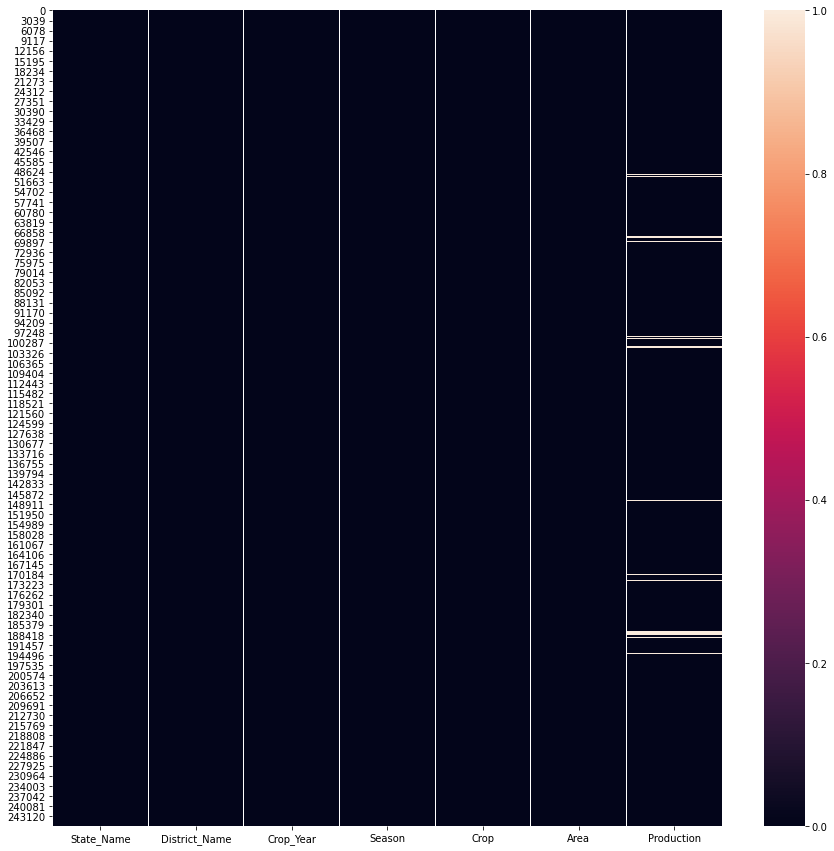

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(df_crop.isnull())
plt.show()

In [40]:
# % of null in the features

In [39]:
(df_crop.isnull().sum()/len(df_crop))*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [43]:
df_crop['Crop_Year'].value_counts().sort_index()

1997     8899
1998    11533
1999    12515
2000    13658
2001    13361
2002    16671
2003    17287
2004    14117
2005    13799
2006    14328
2007    14526
2008    14550
2009    14116
2010    14065
2011    14071
2012    13410
2013    13650
2014    10973
2015      562
Name: Crop_Year, dtype: int64

In [44]:
df2=pd.read_excel('Data Set (1).xlsx',sheet_name=['Rainfall'])

In [65]:
df_rainfall=df2['Rainfall'].copy()

In [66]:
df_rainfall.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [67]:
df_rainfall.shape

(684, 19)

In [68]:
df_crop.describe()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091,246091,246091,246091.0,242361.0
unique,33,646,19,6,124,38442.0,51627.0
top,Uttar Pradesh,BIJAPUR,2003,Kharif,Rice,1.0,1.0
freq,33306,945,17287,95951,15104,4553.0,4028.0


In [69]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   State_Name     246091 non-null  object
 1   District_Name  246091 non-null  object
 2   Crop_Year      246091 non-null  object
 3   Season         246091 non-null  object
 4   Crop           246091 non-null  object
 5   Area           246091 non-null  object
 6   Production     242361 non-null  object
dtypes: object(7)
memory usage: 13.1+ MB


In [70]:
df_crop['Area']=df_crop['Area'].astype('float64')

In [71]:
df_crop['Production']=df_crop['Production'].astype('float64')

In [72]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  object 
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), object(5)
memory usage: 13.1+ MB


In [73]:
df_crop.describe()

,Area,Production
count,2.460910e+05,2.423610e+05
mean,1.200282e+04,5.825034e+05
std,5.052340e+04,1.706581e+07
min,4.000000e-02,0.000000e+00
25%,8.000000e+01,8.800000e+01
50%,5.820000e+02,7.290000e+02
75%,4.392000e+03,7.023000e+03
max,8.580100e+06,1.250800e+09


In [74]:
df_crop.describe(include='object')

,State_Name,District_Name,Crop_Year,Season,Crop
count,246091,246091,246091,246091,246091
unique,33,646,19,6,124
top,Uttar Pradesh,BIJAPUR,2003,Kharif,Rice
freq,33306,945,17287,95951,15104


In [75]:
df_crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [76]:
feature=df_crop.select_dtypes(np.number).columns.tolist()

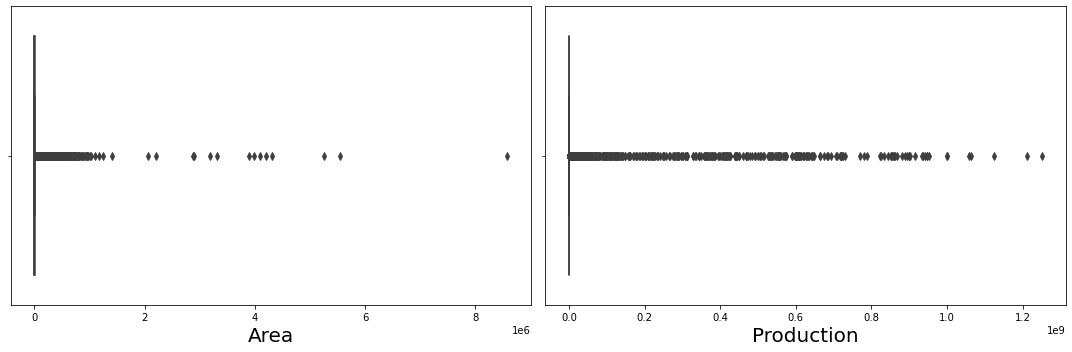

In [77]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
for variable,subplot in zip(feature,ax.flatten()):
    figplot=sns.boxplot(df_crop[variable],ax=subplot)
    figplot.set_xlabel(f"{variable}",fontsize=20)

plt.tight_layout()
plt.show()

In [78]:
feature=df_crop.select_dtypes(np.object).columns.tolist()

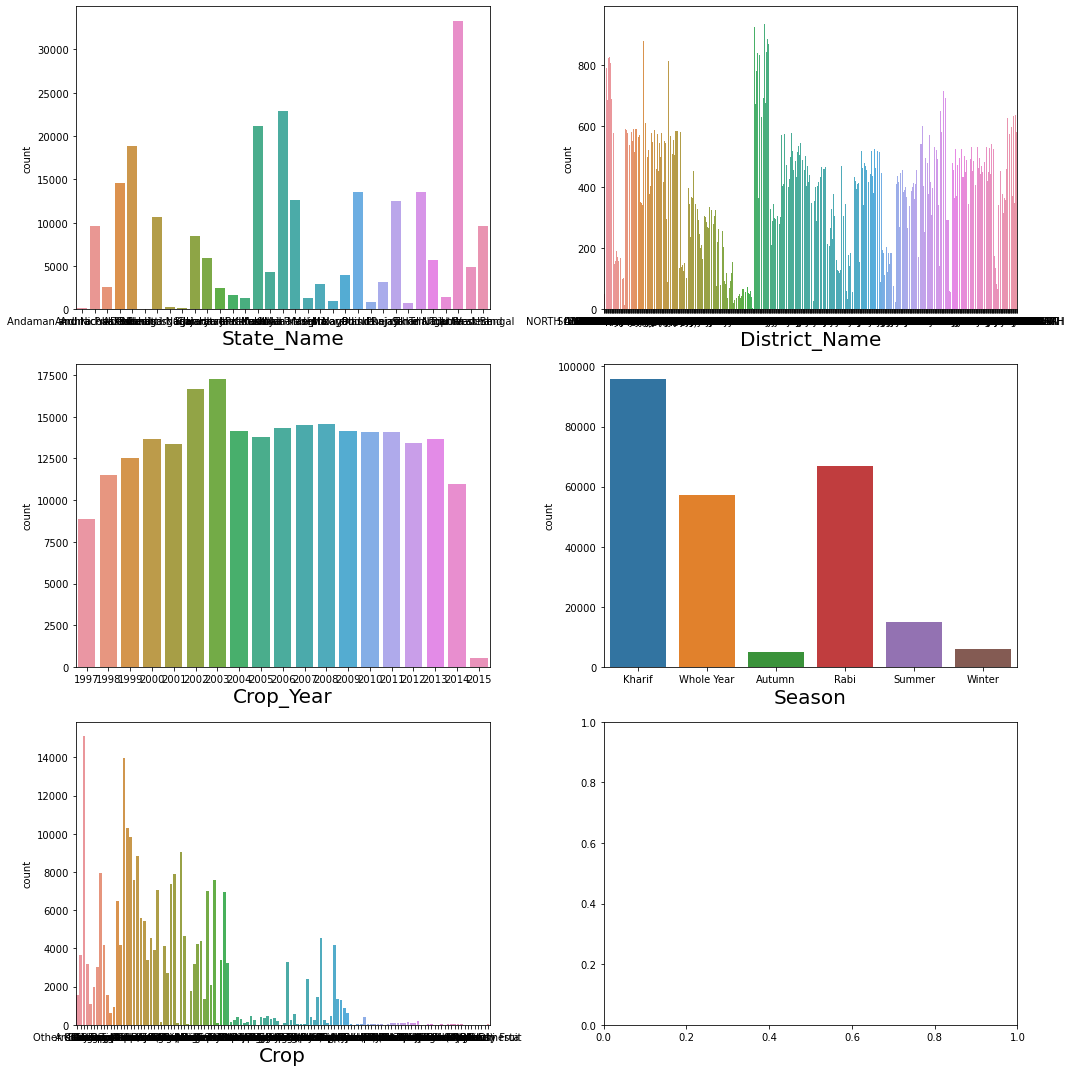

In [79]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
for variable,subplot in zip(feature,ax.flatten()):
    figplot=sns.countplot(df_crop[variable],ax=subplot)
    figplot.set_xlabel(f"{variable}",fontsize=20)

plt.tight_layout()
plt.show()

In [80]:
df_rainfall.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,684.000000,683.000000,683.000000,684.000000,684.000000,684.000000,684.000000,683.000000,684.000000,684.000000,684.000000,683.000000,683.000000,681.000000,682.000000,684.000000,683.000000,683.000000
mean,2006.000000,15.324744,20.081406,27.990205,44.337719,83.702047,224.167251,323.907906,278.223684,194.161842,94.559211,37.011274,16.125183,1358.468282,35.440469,156.029094,1021.168082,147.821816
std,5.481234,29.561050,37.549833,45.112550,65.636447,111.126414,213.545202,254.371826,179.102286,129.452085,99.612144,66.622180,34.820641,856.274824,59.384077,186.031556,677.940309,166.703722
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.400000,10.600000,2.800000,0.000000,0.000000,0.000000,92.400000,0.000000,0.000000,67.200000,0.000000
25%,2001.000000,0.500000,0.500000,0.900000,3.200000,9.300000,72.150000,155.600000,152.200000,99.150000,16.275000,0.900000,0.100000,748.400000,3.000000,25.375000,554.300000,28.250000
50%,2006.000000,3.900000,5.700000,8.050000,18.250000,38.900000,148.000000,269.200000,248.300000,166.000000,62.400000,8.000000,2.300000,1093.000000,15.250000,81.000000,854.800000,90.500000
75%,2011.000000,17.450000,21.750000,32.300000,54.100000,98.225000,295.400000,399.550000,352.425000,259.300000,145.075000,40.750000,14.050000,1648.200000,42.200000,219.500000,1259.900000,205.600000
max,2015.000000,296.000000,403.500000,341.400000,466.900000,705.300000,1153.000000,1778.900000,1146.000000,868.900000,618.600000,383.800000,283.900000,4229.400000,699.500000,1017.500000,3727.600000,935.400000


In [81]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  684 non-null    object 
 1   YEAR           684 non-null    int64  
 2   JAN            683 non-null    float64
 3   FEB            683 non-null    float64
 4   MAR            684 non-null    float64
 5   APR            684 non-null    float64
 6   MAY            684 non-null    float64
 7   JUN            684 non-null    float64
 8   JUL            683 non-null    float64
 9   AUG            684 non-null    float64
 10  SEP            684 non-null    float64
 11  OCT            684 non-null    float64
 12  NOV            683 non-null    float64
 13  DEC            683 non-null    float64
 14  ANNUAL         681 non-null    float64
 15  Jan-Feb        682 non-null    float64
 16  Mar-May        684 non-null    float64
 17  Jun-Sep        683 non-null    float64
 18  Oct-Dec   

In [82]:
df_rainfall.isnull().sum()

STATE_UT_NAME    0
YEAR             0
JAN              1
FEB              1
MAR              0
APR              0
MAY              0
JUN              0
JUL              1
AUG              0
SEP              0
OCT              0
NOV              1
DEC              1
ANNUAL           3
Jan-Feb          2
Mar-May          0
Jun-Sep          1
Oct-Dec          1
dtype: int64

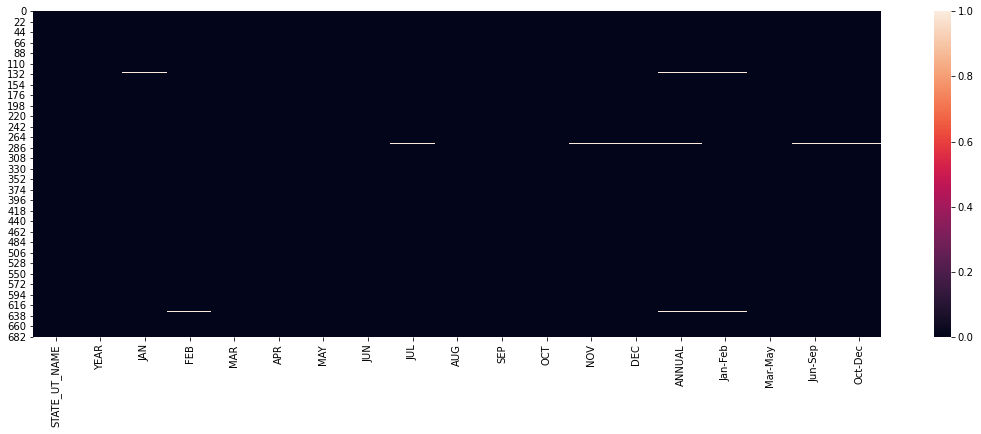

In [83]:
plt.figure(figsize=(19,6))
sns.heatmap(df_rainfall.isnull())
plt.show()

In [84]:
df_rainfall.describe(include=np.object)

,STATE_UT_NAME
count,684
unique,36
top,SUB HIMALAYAN WEST BENGAL & SIKKIM
freq,19


In [85]:
df_rainfall.dropna().reset_index(drop=True)

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,WEST UTTAR PRADESH,2011,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
677,WEST UTTAR PRADESH,2012,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
678,WEST UTTAR PRADESH,2013,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
679,WEST UTTAR PRADESH,2014,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


In [121]:
feature=df_rainfall.select_dtypes(np.number).columns.tolist()

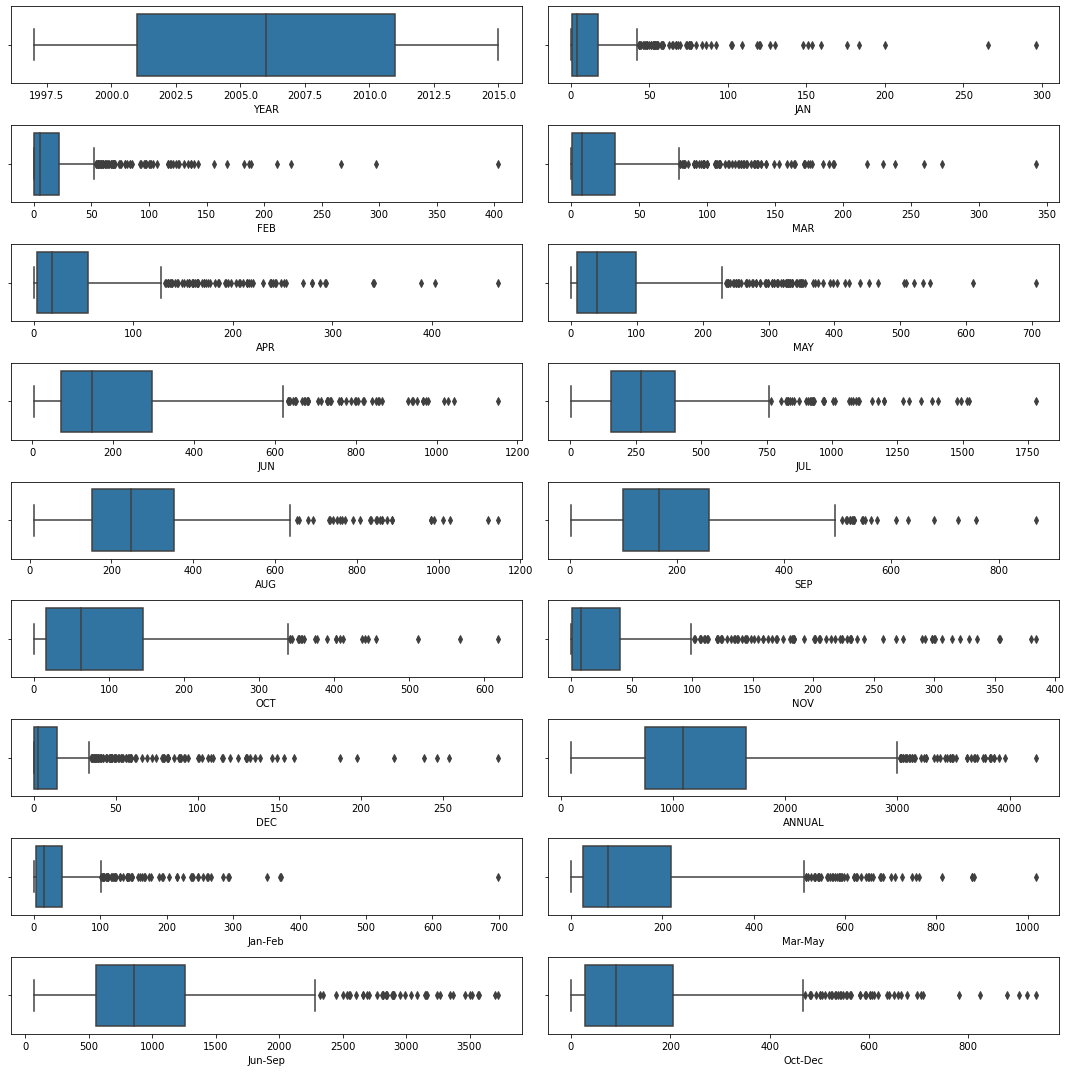

In [124]:
fig, ax = plt.subplots(9,2,figsize=(15,15))
for variable,subplot in zip(feature,ax.flatten()):
    figplot=sns.boxplot(df_rainfall[variable],ax=subplot)
    figplot.set_xlabel(f"{variable}",fontsize=10)

plt.tight_layout()
plt.show()

In [133]:
df_rainfall.select_dtypes(include=np.object)

,STATE_UT_NAME
0,ANDAMAN & NICOBAR ISLANDS
1,ANDAMAN & NICOBAR ISLANDS
2,ANDAMAN & NICOBAR ISLANDS
3,ANDAMAN & NICOBAR ISLANDS
4,ANDAMAN & NICOBAR ISLANDS
...,...
679,WEST UTTAR PRADESH
680,WEST UTTAR PRADESH
681,WEST UTTAR PRADESH
682,WEST UTTAR PRADESH


In [136]:
df_rainfall['STATE_UT_NAME'].value_counts()

EAST RAJASTHAN                        19
WEST UTTAR PRADESH                    19
WEST MADHYA PRADESH                   19
ASSAM & MEGHALAYA                     19
CHHATTISGARH                          19
NAGA MANI MIZO TRIPURA                19
TAMIL NADU                            19
ANDAMAN & NICOBAR ISLANDS             19
COASTAL ANDHRA PRADESH                19
HIMACHAL PRADESH                      19
VIDARBHA                              19
WEST RAJASTHAN                        19
UTTARAKHAND                           19
PUNJAB                                19
KONKAN & GOA                          19
NORTH INTERIOR KARNATAKA              19
GUJARAT REGION                        19
HARYANA DELHI & CHANDIGARH            19
ARUNACHAL PRADESH                     19
ORISSA                                19
TELANGANA                             19
GANGETIC WEST BENGAL                  19
EAST MADHYA PRADESH                   19
BIHAR                                 19
RAYALSEEMA      

In [137]:
df_crop.to_csv('Crop_Prod.csv')
df_rainfall.to_csv('Rainfall.csv')

In [88]:
df_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [94]:
df_crop.groupby(['Crop_Year'])['Production'].mean().sort_index().index

Int64Index([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Crop_Year')

In [106]:
df_crop.groupby(['Crop_Year'])['Production'].mean().sort_values()

Crop_Year
2015    1.236197e+04
1997    9.565489e+04
2010    4.573050e+05
2003    4.619857e+05
2002    4.654666e+05
2007    4.821251e+05
1999    5.172145e+05
1998    5.172545e+05
2008    5.423063e+05
2000    5.496723e+05
2009    5.564389e+05
2001    5.616144e+05
2004    5.909555e+05
2005    5.949965e+05
2012    6.197705e+05
2006    6.212016e+05
2014    8.011596e+05
2013    9.575947e+05
2011    1.037554e+06
Name: Production, dtype: float64

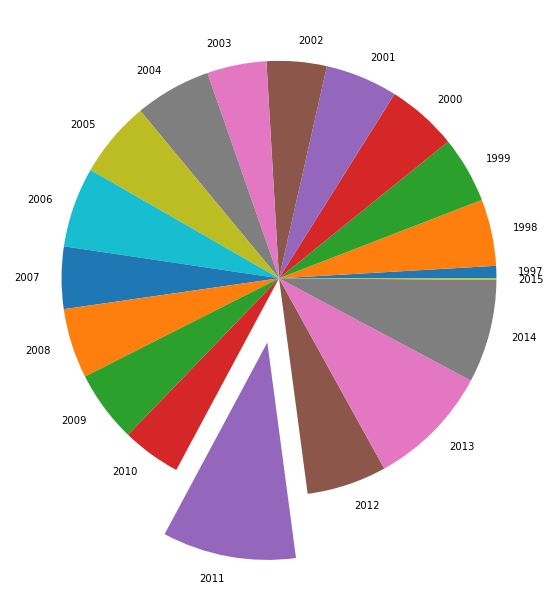

In [105]:
plt.figure(figsize=(18,10))
labels=df_crop.groupby(['Crop_Year'])['Production'].mean().sort_index().index.tolist()
explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0]
plt.pie(df_crop.groupby(['Crop_Year'])['Production'].mean().sort_index(),labels=labels,explode=explode)
plt.show()

In [137]:
a=pd.DataFrame(df_crop.groupby(['Crop_Year','Crop'])['Production'].sum().sort_values(ascending=False).groupby(
             ['Crop_Year']).head(1))

In [138]:
a.reset_index(inplace=True)

In [139]:
a.head()

,Crop_Year,Crop,Production
0,2011,Coconut,1.359422e+10
1,2013,Coconut,1.221919e+10
2,2006,Coconut,8.092567e+09
3,2014,Coconut,8.067812e+09
4,2004,Coconut,7.663984e+09


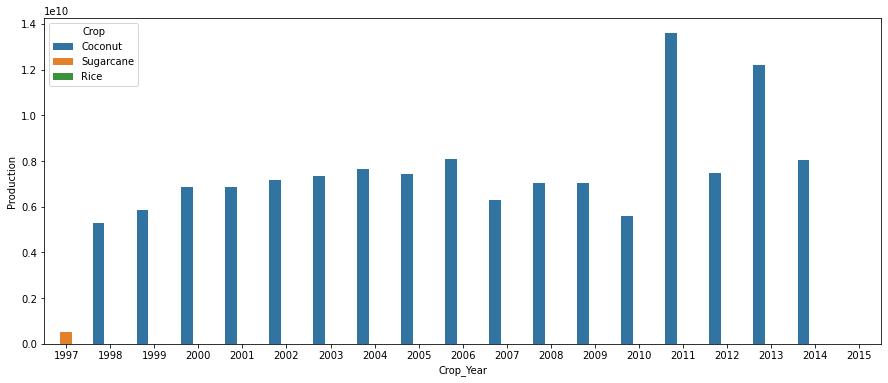

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(x=a['Crop_Year'],y=a['Production'],hue=a['Crop'],)
plt.show()

In [ ]:
df_crop.groupby(['State_Name','Crop'])['Production'].mean()

In [118]:
df_crop['Crop_Year'].value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

In [157]:
df_crop.groupby(['State_Name','Crop'])['Production'].mean().sort_values(ascending=False).groupby(
             ['State_Name']).head(1)

State_Name                   Crop           
Kerala                       Coconut            3.881073e+08
Andhra Pradesh               Coconut            9.944380e+07
Goa                          Coconut            4.192605e+07
Andaman and Nicobar Islands  Coconut            3.987722e+07
Tamil Nadu                   Coconut            3.745802e+07
Puducherry                   Coconut            6.651561e+06
Assam                        Coconut            4.886020e+06
West Bengal                  Coconut            3.323339e+06
Maharashtra                  Sugarcane          2.058083e+06
Telangana                    Coconut            2.032173e+06
Uttar Pradesh                Sugarcane          1.726391e+06
Uttarakhand                  Sugarcane          1.301352e+06
Karnataka                    Sugarcane          1.283198e+06
Gujarat                      Sugarcane          9.299246e+05
Punjab                       Wheat              8.193669e+05
Haryana                      Wheat      

In [161]:
b=pd.DataFrame(df_crop.groupby(['State_Name','Crop'])['Production'].mean().sort_values(ascending=False).groupby(
             ['State_Name']).head(1))

In [164]:
b

,,Production
State_Name,Crop,
Kerala,Coconut,3.881073e+08
Andhra Pradesh,Coconut,9.944380e+07
Goa,Coconut,4.192605e+07
Andaman and Nicobar Islands,Coconut,3.987722e+07
Tamil Nadu,Coconut,3.745802e+07
Puducherry,Coconut,6.651561e+06
Assam,Coconut,4.886020e+06
West Bengal,Coconut,3.323339e+06
Maharashtra,Sugarcane,2.058083e+06


In [168]:
c=pd.DataFrame(df_crop.groupby(['Season','Crop'])['Production'].mean().sort_values(ascending=False).groupby(['Season']).head(1))

In [169]:
c

,,Production
Season,Crop,
Whole Year,Coconut,6.682854e+07
Kharif,Sugarcane,1.531013e+06
Rabi,Oilseeds total,1.334167e+06
Winter,Rice,1.692855e+05
Summer,Rice,4.325975e+04
Autumn,Rice,2.483417e+04


In [170]:
c.reset_index(inplace=True)

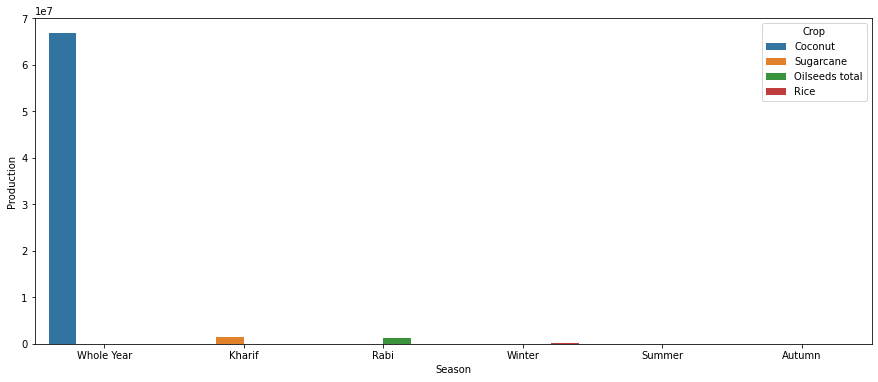

In [174]:
plt.figure(figsize=(15,6))
sns.barplot(x=c['Season'],y=c['Production'], hue=c['Crop'])
plt.show()

In [175]:
df_rainfall.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [177]:
df_rainfall.groupby('STATE_UT_NAME')['Jun-Sep'].mean().sort_values(ascending=False)

STATE_UT_NAME
COASTAL KARNATAKA                     3036.757895
KONKAN & GOA                          2876.936842
SUB HIMALAYAN WEST BENGAL & SIKKIM    1985.310526
KERALA                                1950.200000
ANDAMAN & NICOBAR ISLANDS             1665.068421
ARUNACHAL PRADESH                     1639.600000
ASSAM & MEGHALAYA                     1620.426316
NAGA MANI MIZO TRIPURA                1353.605263
GANGETIC WEST BENGAL                  1175.373684
ORISSA                                1163.884211
CHHATTISGARH                          1122.473684
UTTARAKHAND                           1069.521053
JHARKHAND                             1007.305263
LAKSHADWEEP                           1006.510526
EAST MADHYA PRADESH                    981.115789
BIHAR                                  951.563158
VIDARBHA                               948.947368
GUJARAT REGION                         896.794737
WEST MADHYA PRADESH                    846.494737
MADHYA MAHARASHTRA                  

In [187]:
d=pd.DataFrame(df_rainfall.groupby('YEAR')['ANNUAL'].mean())

In [188]:
e=pd.DataFrame(df_crop.groupby('Crop_Year')['Production'].sum())

In [201]:
df_rainfall.describe().loc['mean'][1:]

JAN          15.324744
FEB          20.081406
MAR          27.990205
APR          44.337719
MAY          83.702047
JUN         224.167251
JUL         323.907906
AUG         278.223684
SEP         194.161842
OCT          94.559211
NOV          37.011274
DEC          16.125183
ANNUAL     1358.468282
Jan-Feb      35.440469
Mar-May     156.029094
Jun-Sep    1021.168082
Oct-Dec     147.821816
Name: mean, dtype: float64

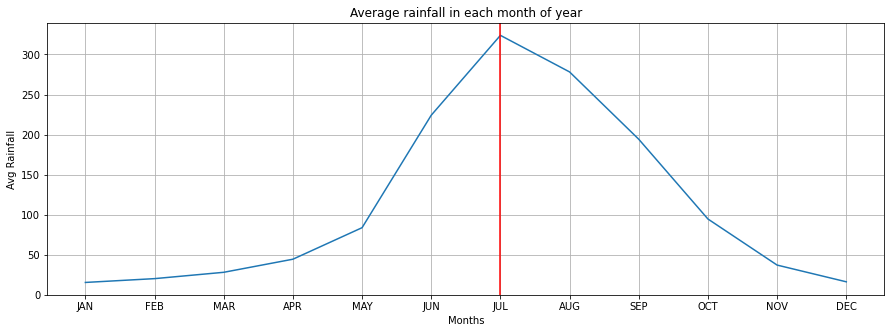

In [209]:
plt.figure(figsize=(15,5))
plt.plot(df_rainfall.describe().loc['mean'][1:].loc['JAN':'DEC'])
plt.axvline('JUL',color='red')
plt.title("Average rainfall in each month of year")
plt.xlabel("Months")
plt.ylabel("Avg Rainfall")
plt.grid()
plt.show()

July receives the highest rainfall

In [211]:
df_rainfall.groupby(['YEAR'])['ANNUAL'].sum().sort_values(ascending=False)

YEAR
1998    54964.0
2007    54506.4
2013    53106.2
2010    52855.0
2005    52431.5
1997    50982.3
2006    50646.2
2011    50146.4
1999    49968.8
2008    49226.2
2003    48760.7
2001    46897.3
2004    46753.2
2000    46346.6
2015    46101.0
2014    44796.1
2012    43524.5
2009    41746.6
2002    41357.9
Name: ANNUAL, dtype: float64

<BarContainer object of 19 artists>

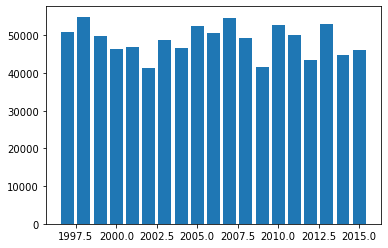

In [216]:
plt.bar(df_rainfall.groupby(['YEAR'])['ANNUAL'].sum().sort_index().index, df_rainfall.groupby(['YEAR'])['ANNUAL'].sum().sort_index().values)

In [217]:
df_crop['Crop_Year'].nunique()

19

In [218]:
df_rainfall['YEAR'].nunique()

19

In [220]:
df_crop['Crop_Year'].value_counts().sort_index()

1997     8899
1998    11533
1999    12515
2000    13658
2001    13361
2002    16671
2003    17287
2004    14117
2005    13799
2006    14328
2007    14526
2008    14550
2009    14116
2010    14065
2011    14071
2012    13410
2013    13650
2014    10973
2015      562
Name: Crop_Year, dtype: int64

In [221]:
df_rainfall['YEAR'].value_counts().sort_index()

1997    36
1998    36
1999    36
2000    36
2001    36
2002    36
2003    36
2004    36
2005    36
2006    36
2007    36
2008    36
2009    36
2010    36
2011    36
2012    36
2013    36
2014    36
2015    36
Name: YEAR, dtype: int64

In [222]:
df_crop['State_Name'].nunique()

33

In [230]:
(df_crop.isnull().sum())/len(df_crop)

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       0.015157
dtype: float64

In [231]:
df_crop.corr()

,Area,Production
Area,1.000000,0.040587
Production,0.040587,1.000000


In [232]:
df_crop.describe()

,Area,Production
count,2.460910e+05,2.423610e+05
mean,1.200282e+04,5.825034e+05
std,5.052340e+04,1.706581e+07
min,4.000000e-02,0.000000e+00
25%,8.000000e+01,8.800000e+01
50%,5.820000e+02,7.290000e+02
75%,4.392000e+03,7.023000e+03
max,8.580100e+06,1.250800e+09


In [236]:
df_crop['Production'].mean()

582503.4422509839

In [237]:
df_crop['Production'].min()

0.0

In [238]:
df_crop['Production'].max()

1250800000.0

In [239]:
df_rainfall['STATE_UT_NAME'].nunique()

36

In [240]:
df_rainfall.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,684.000000,683.000000,683.000000,684.000000,684.000000,684.000000,684.000000,683.000000,684.000000,684.000000,684.000000,683.000000,683.000000,681.000000,682.000000,684.000000,683.000000,683.000000
mean,2006.000000,15.324744,20.081406,27.990205,44.337719,83.702047,224.167251,323.907906,278.223684,194.161842,94.559211,37.011274,16.125183,1358.468282,35.440469,156.029094,1021.168082,147.821816
std,5.481234,29.561050,37.549833,45.112550,65.636447,111.126414,213.545202,254.371826,179.102286,129.452085,99.612144,66.622180,34.820641,856.274824,59.384077,186.031556,677.940309,166.703722
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.400000,10.600000,2.800000,0.000000,0.000000,0.000000,92.400000,0.000000,0.000000,67.200000,0.000000
25%,2001.000000,0.500000,0.500000,0.900000,3.200000,9.300000,72.150000,155.600000,152.200000,99.150000,16.275000,0.900000,0.100000,748.400000,3.000000,25.375000,554.300000,28.250000
50%,2006.000000,3.900000,5.700000,8.050000,18.250000,38.900000,148.000000,269.200000,248.300000,166.000000,62.400000,8.000000,2.300000,1093.000000,15.250000,81.000000,854.800000,90.500000
75%,2011.000000,17.450000,21.750000,32.300000,54.100000,98.225000,295.400000,399.550000,352.425000,259.300000,145.075000,40.750000,14.050000,1648.200000,42.200000,219.500000,1259.900000,205.600000
max,2015.000000,296.000000,403.500000,341.400000,466.900000,705.300000,1153.000000,1778.900000,1146.000000,868.900000,618.600000,383.800000,283.900000,4229.400000,699.500000,1017.500000,3727.600000,935.400000
